## Image Classification

In [35]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import ensemble
import time

In [7]:
# Importing dataset
lfw = datasets.fetch_lfw_people(min_faces_per_person=100, resize=0.4)

In [8]:
# Checking what all info the dataset consists of
lfw.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [9]:
# inspecting shape of the images 
# should be a tuple of the form (a, b, c), where:
# => a = no of images
# => b,c - dimensions of a single pixel
lfw.images.shape

(1140, 50, 37)

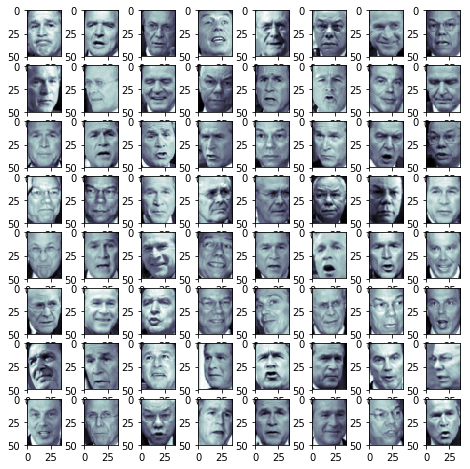

In [10]:
# Plotting the images using matplotlib
fig = plt.figure(figsize=(8, 8))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(lfw.images[i], cmap = plt.cm.bone)
plt.show()

In [24]:
# Applying PCA without deimensionality reduction
x, y = lfw.data, lfw.target
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)
pca = PCA()
pca.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [25]:
# Determining best K
k = 0
total = 0
while total < 0.99:
    total += pca.explained_variance_ratio_[k]
    k += 1
k

316

In [26]:
pca_lfw = PCA(n_components = k, whiten = True)
x_transformed = pca_lfw.fit_transform(x_train)
x_transformed.shape

(855, 316)

In [28]:
# Reproducing the images and plotting them
x_approx = pca_lfw.inverse_transform(x_transformed)
x_approx = x_approx.reshape((855, 50, 37))

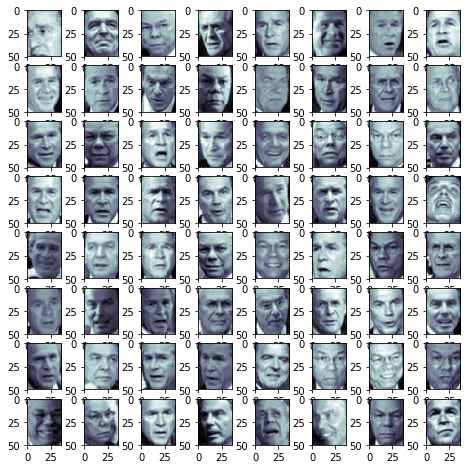

In [29]:
fig = plt.figure(figsize=(8, 8))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(x_approx[i], cmap = plt.cm.bone)
plt.show()

In [30]:
# Eigenfaces
pca_lfw.components_.shape, pca.components_.shape

((316, 1850), (855, 1850))

In [31]:
# Reshape the components from all to k
eigenv = pca_lfw.components_.reshape(k, 50, 37)

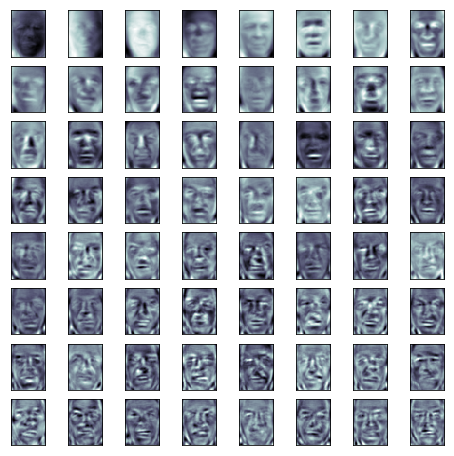

In [32]:
fig = plt.figure(figsize=(8, 8))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1, xticks = [], yticks = [])
    ax.imshow(eigenv[i], cmap = plt.cm.bone)
plt.show()

In [33]:
x_train_pca = x_transformed
x_test_pca = pca_lfw.transform(x_test)

In [34]:
# Classifying using rand forest
rf = ensemble.RandomForestClassifier()

In [39]:
# wout pca
start = time.time()
rf.fit(x_train, y_train)
print(time.time() - start)
y_pred = rf.predict(x_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.28379392623901367
              precision    recall  f1-score   support

           0       0.51      0.67      0.58        61
           1       0.38      0.14      0.20        36
           2       0.62      0.87      0.73       122
           3       0.60      0.19      0.29        31
           4       0.58      0.20      0.30        35

   micro avg       0.58      0.58      0.58       285
   macro avg       0.54      0.41      0.42       285
weighted avg       0.56      0.58      0.53       285

[[ 41   3  17   0   0]
 [ 15   5  16   0   0]
 [ 12   3 106   0   1]
 [  5   2  14   6   4]
 [  7   0  17   4   7]]


In [41]:
# with pca
start = time.time()
rf.fit(x_train_pca, y_train)
print(time.time() - start)
y_pred = rf.predict(x_test_pca)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.17596650123596191
              precision    recall  f1-score   support

           0       0.48      0.48      0.48        61
           1       0.54      0.19      0.29        36
           2       0.52      0.83      0.64       122
           3       0.33      0.06      0.11        31
           4       0.38      0.14      0.21        35

   micro avg       0.51      0.51      0.51       285
   macro avg       0.45      0.34      0.34       285
weighted avg       0.48      0.51      0.45       285

[[ 29   2  28   1   1]
 [  5   7  23   1   0]
 [ 15   2 101   2   2]
 [  5   1  18   2   5]
 [  6   1  23   0   5]]
